In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
dataset = pd.read_csv('./src/Cancer_Data.csv',usecols=range(0, 32)) # there are 32 columns in the dataset but the 33 columns exists with null value
dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean   
0    842302         M        17.99         10.38          122.80     1001.0  \
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
0          0.11840           0.27760          0.3001              0.14710  \
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst   
0  ...         25.38          17.33           184.60      2019.0  \
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst   
0            0.1622             0.6656           0.7119                0.2654  \
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

M = Malignant Tumor
B = Benign Tumor

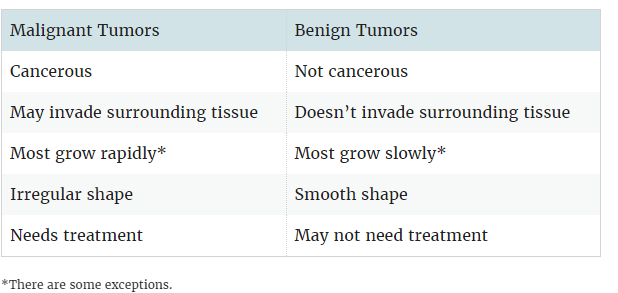

In [8]:
col = dataset.columns.to_list()
print(col)
label = col[1]
print('target:',label)
mean_feature = [ x for x in col if 'mean' in x]
se_feature = [ x for x in col if 'se' in x]
worst_feature = [x for x in col if 'worst' in x]
print('mean feauture:',mean_feature)
print('standard error feature:', se_feature)
print('worst_feature:', worst_feature)


['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
target: diagnosis
mean feauture: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
standard error feature: ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
worst_feature: ['radius_wo

from the label we can see that the diagnosis is our target(label) cols
and others will be our train dataset which mainly classified in 3 indexes:
1. mean
2. standard error
3. worst?(I dont know what does it mean, maybe the smallest?)

In [9]:
df_mean = dataset[mean_feature]
df_se = dataset[se_feature]
df_worst = dataset[worst_feature]

lets examine null and duplicate datas

In [10]:
#is there are any null value in the dataset
print(dataset.isnull().sum())
print("is there any null exist in the dataset? :",dataset.isnull().values.any())


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
is there any null exist in the dataset? : False


In [11]:
#is there are duplicate value in the dataset
dataset.duplicated().sum()
print("is there any duplicate exist in the dataset? :",dataset.duplicated().values.any())

is there any duplicate exist in the dataset? : False


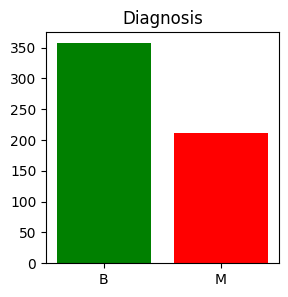

In [12]:
# dataset.diagnosis.value_counts()
plt.figure(figsize=(3, 3))
plt.bar(dataset.diagnosis.value_counts().index,dataset.diagnosis.value_counts().values, color=['green', 'red'])
plt.title("Diagnosis")
plt.show()

well seem like a bias datasets?
may be we need to <u>upsampling</u> them later

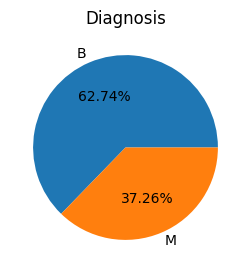

In [13]:
# dataset.diagnosis.value_counts()
plt.figure(figsize=(3, 3))
plt.pie(dataset.diagnosis.value_counts(),autopct='%1.2f%%',labels=dataset.diagnosis.value_counts().index)
plt.title("Diagnosis")
plt.show()


just found this cool pie chart lol!

### Pairplot for quick viz

In [14]:
import seaborn as sns

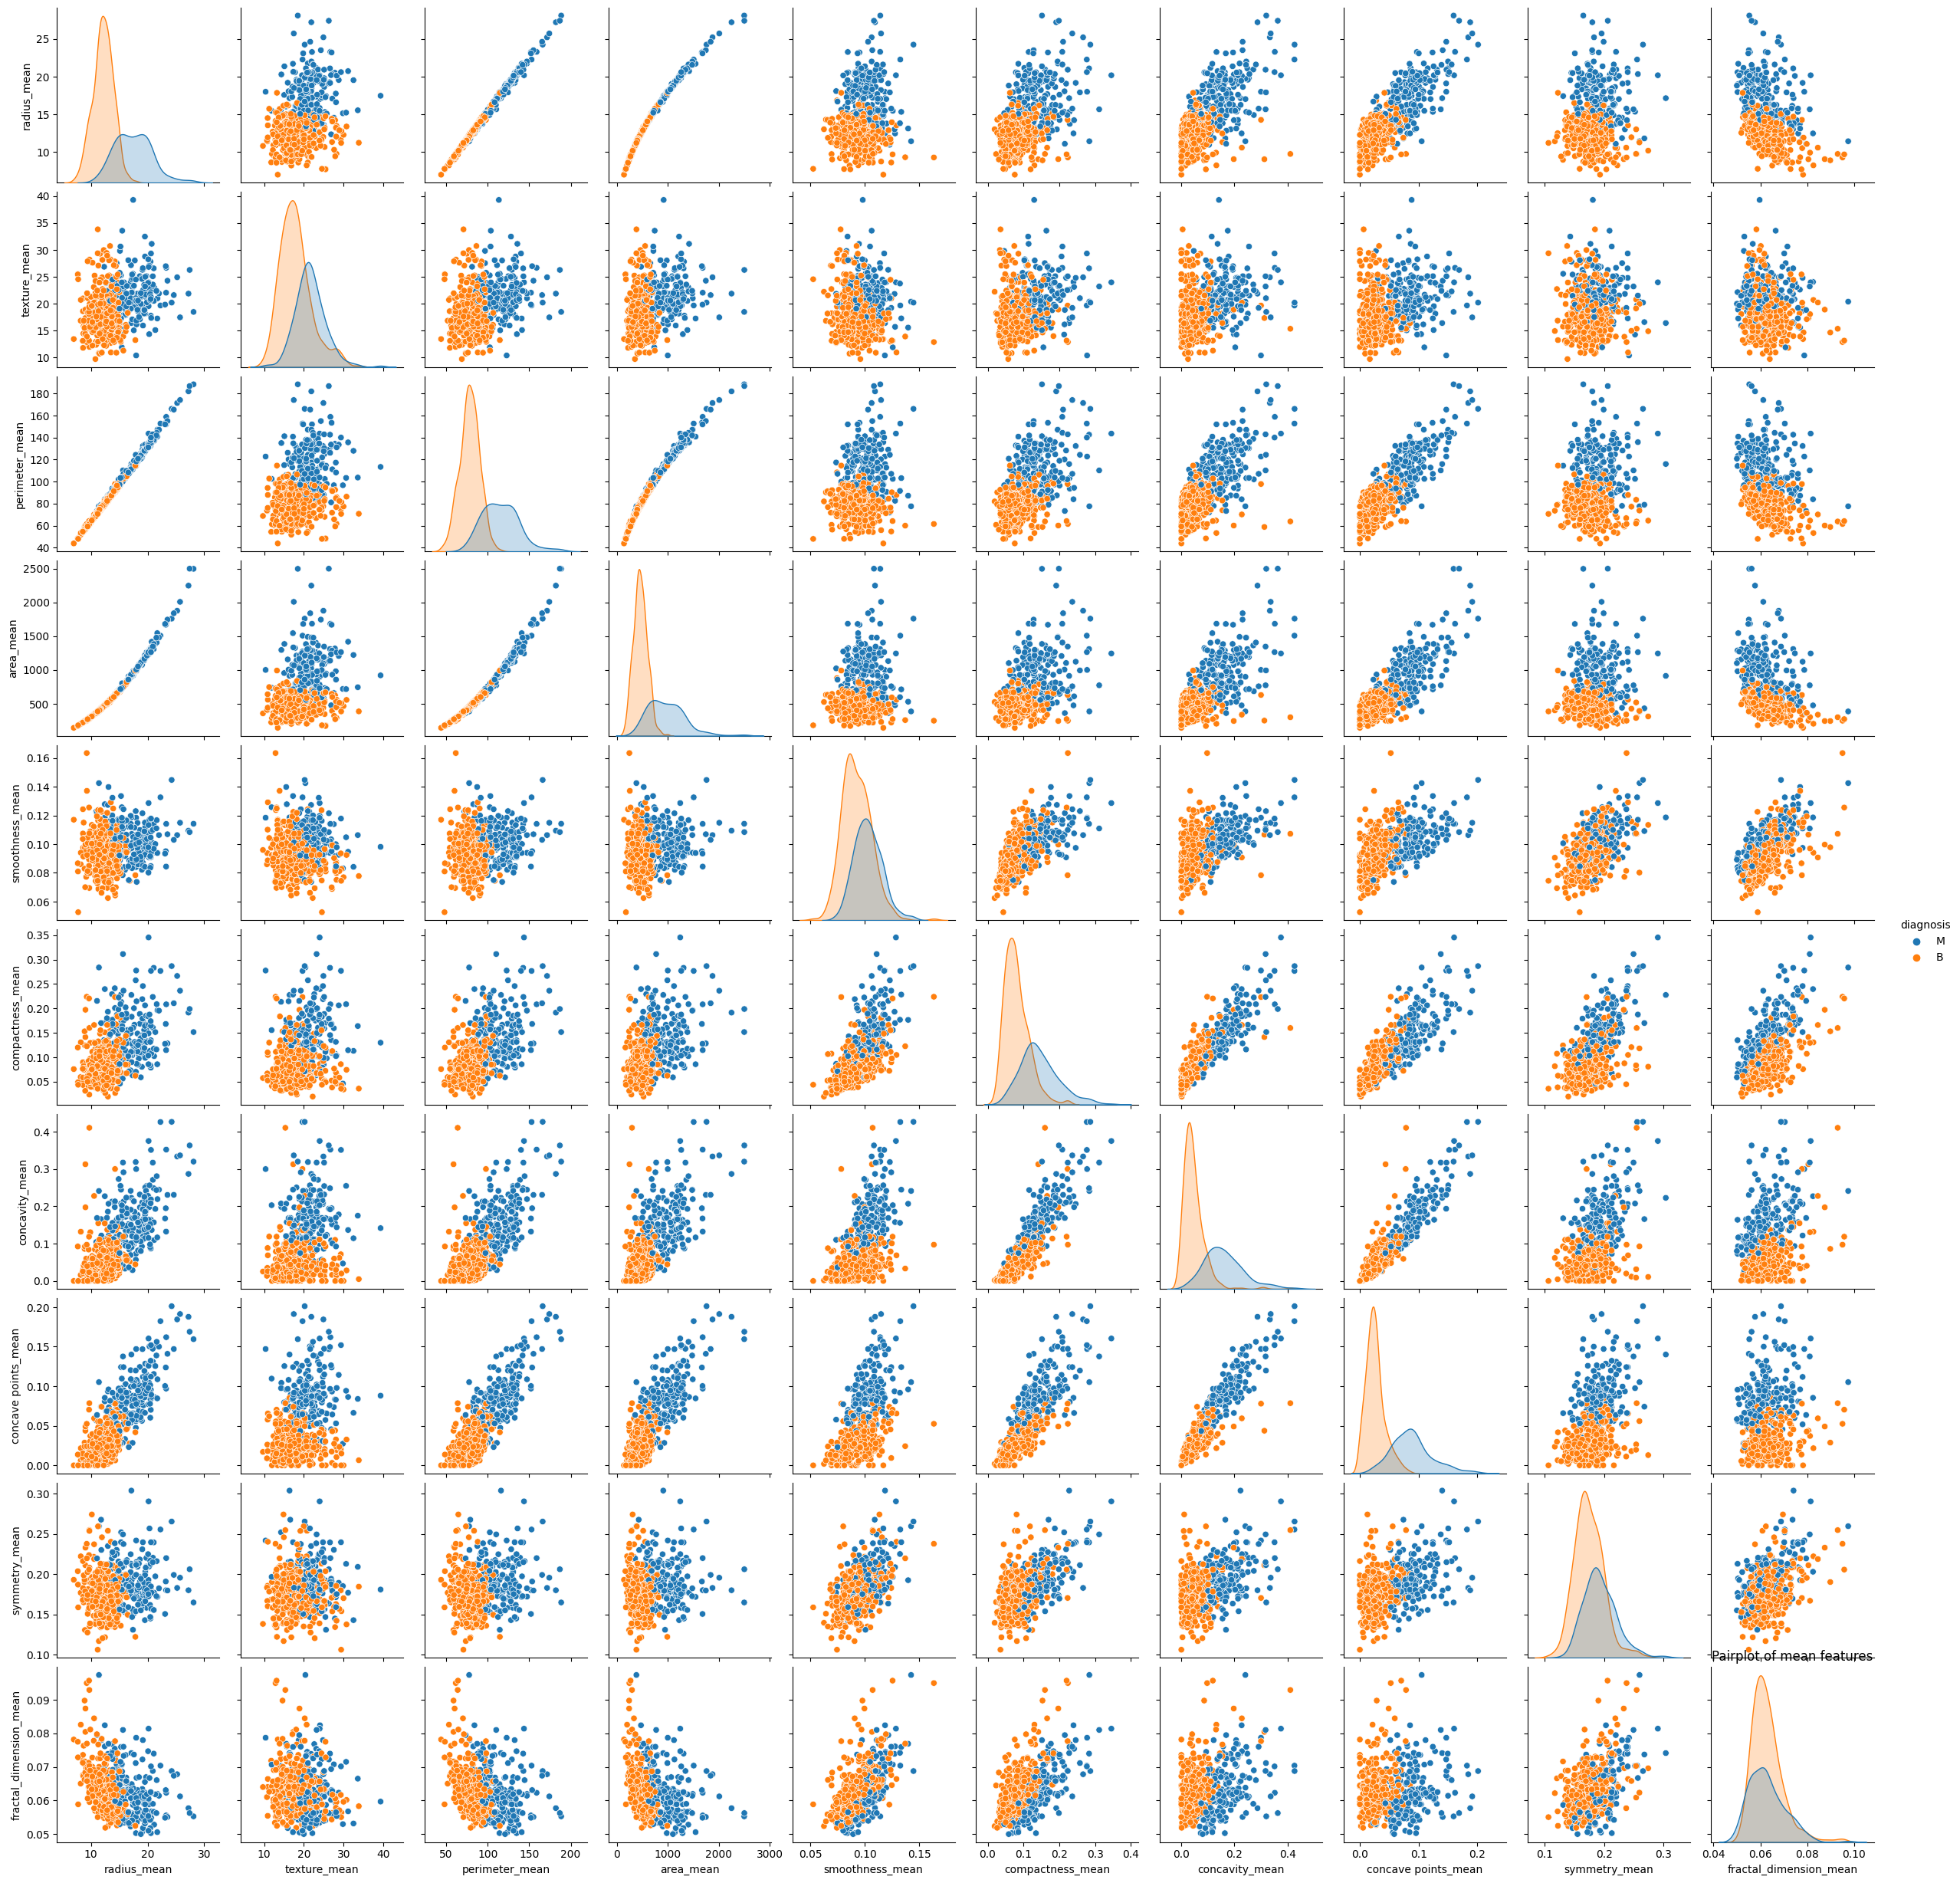

In [15]:
import seaborn as sns
sns.pairplot(dataset, hue='diagnosis',vars=mean_feature)
plt.title("Pairplot of mean features")
plt.show()

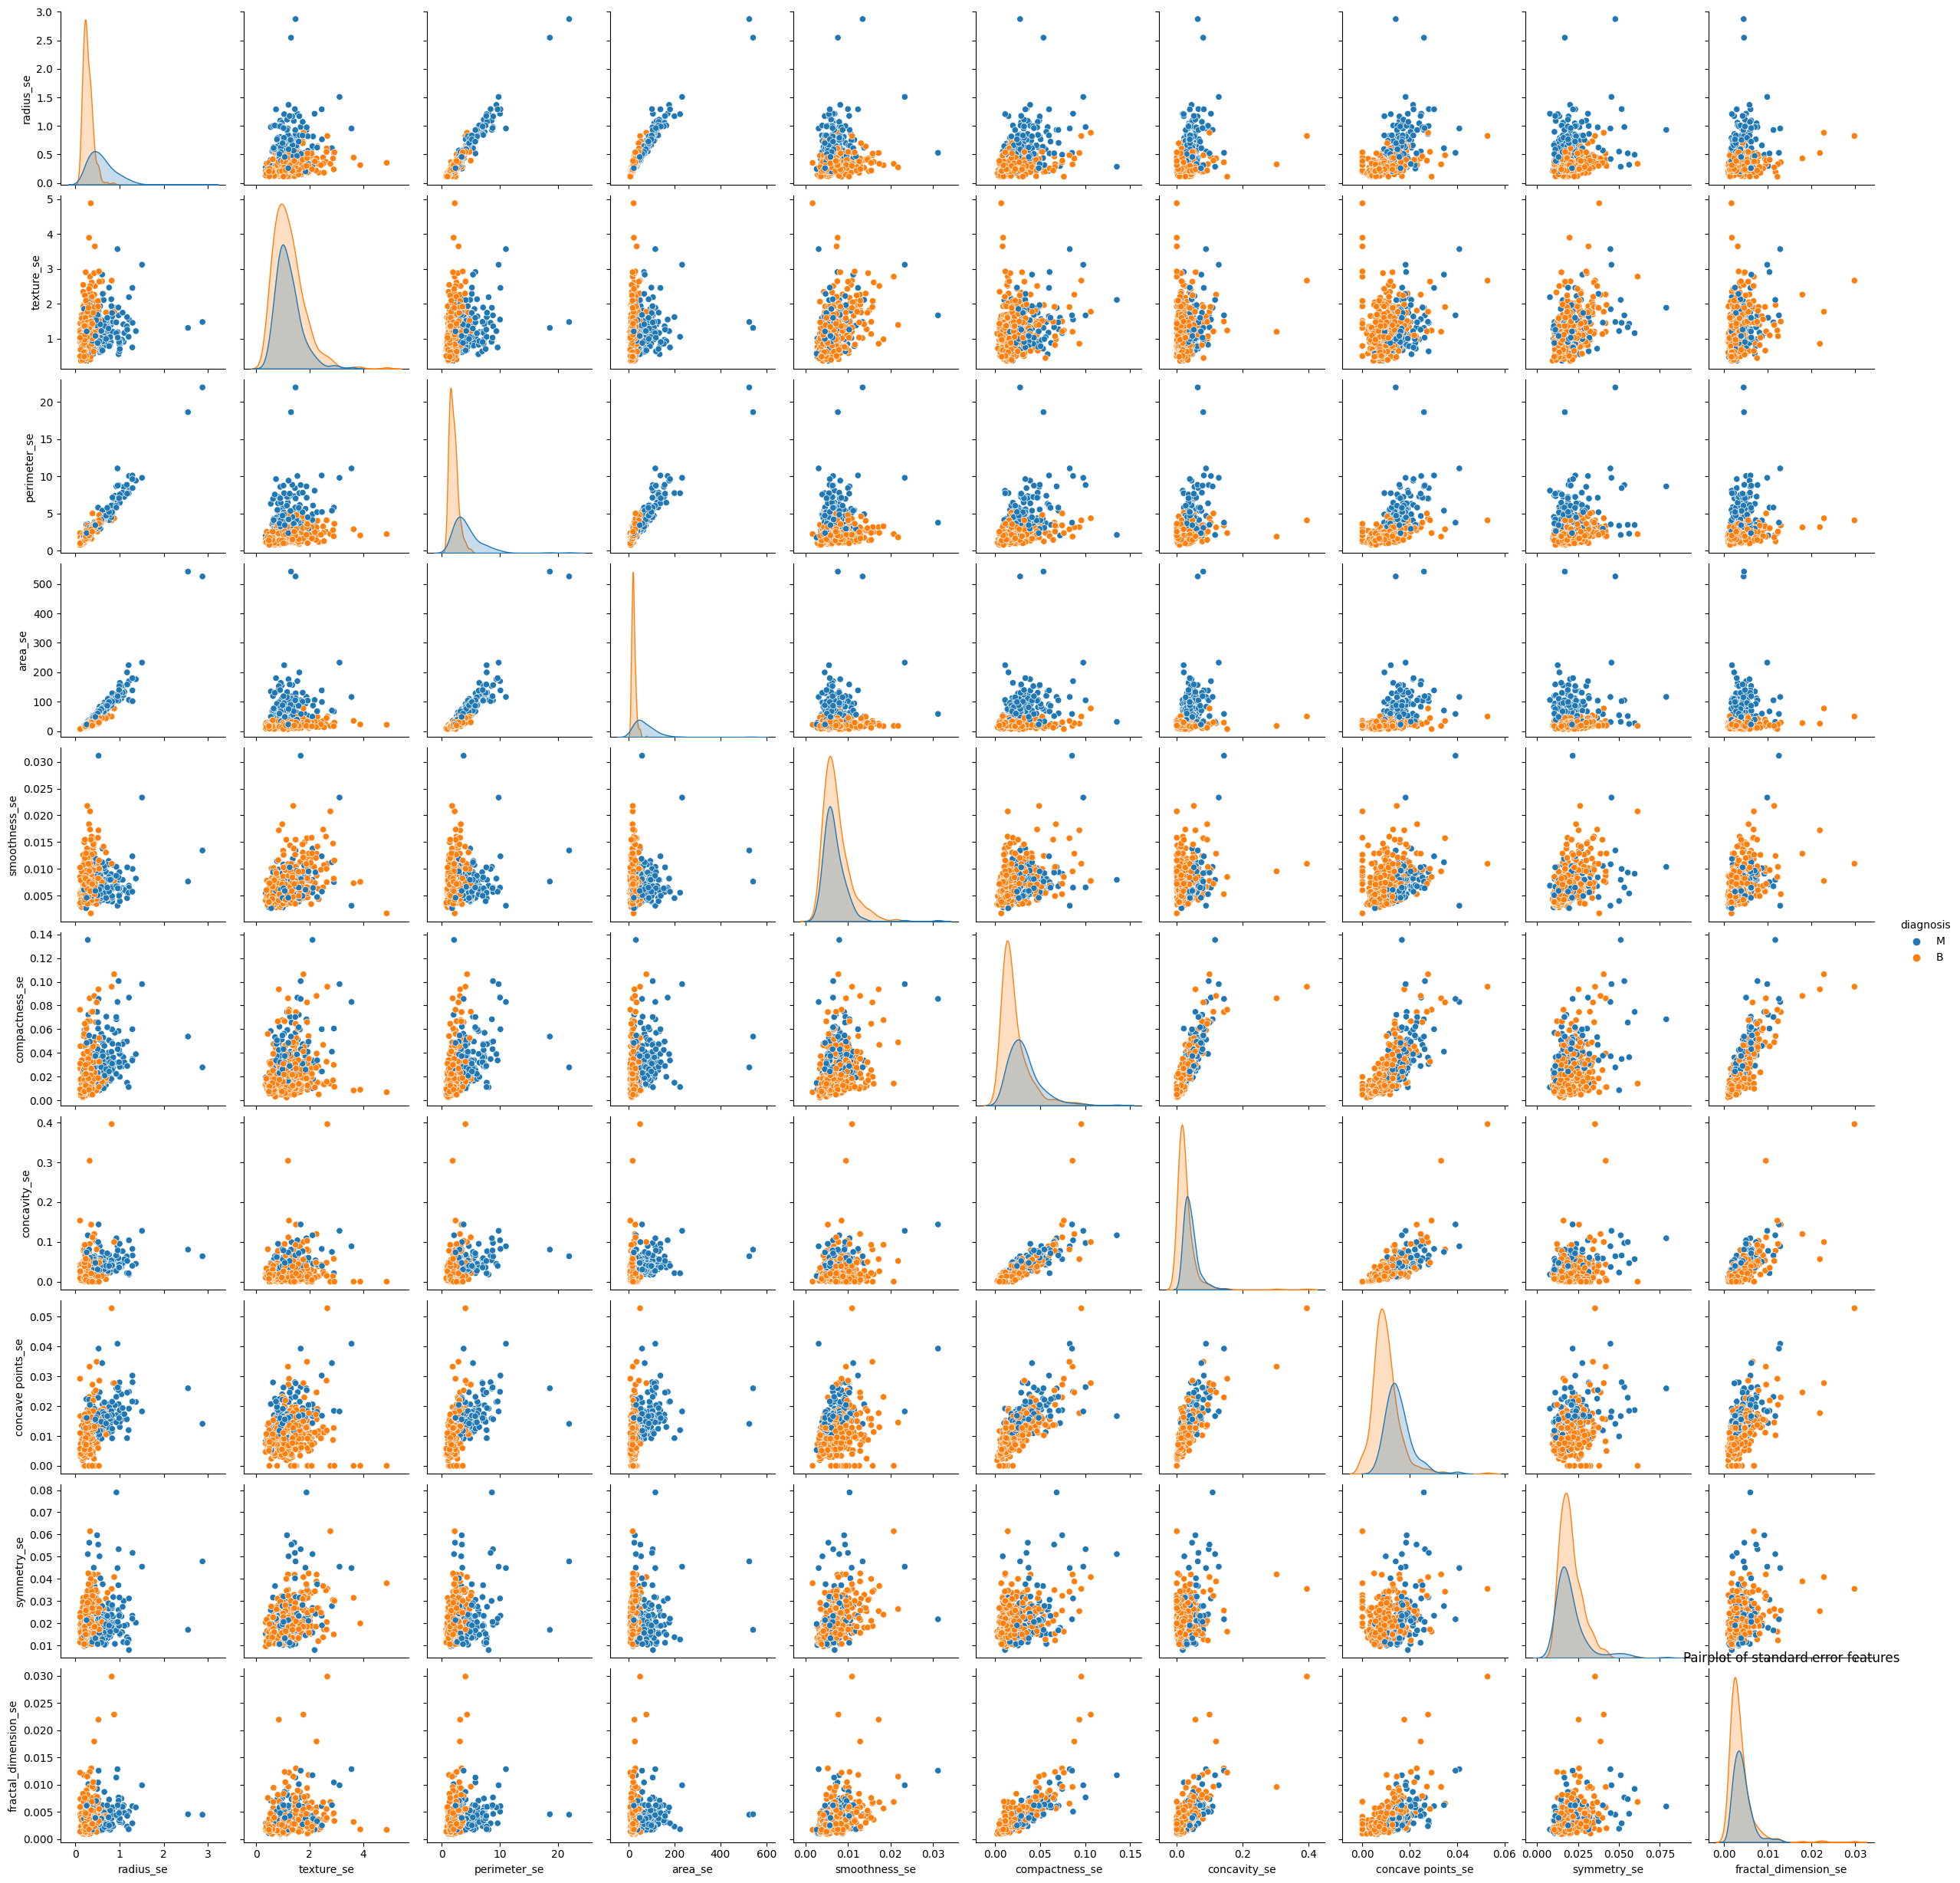

In [16]:
sns.pairplot(dataset, hue='diagnosis',vars=se_feature)
plt.title("Pairplot of standard error features")
plt.show()

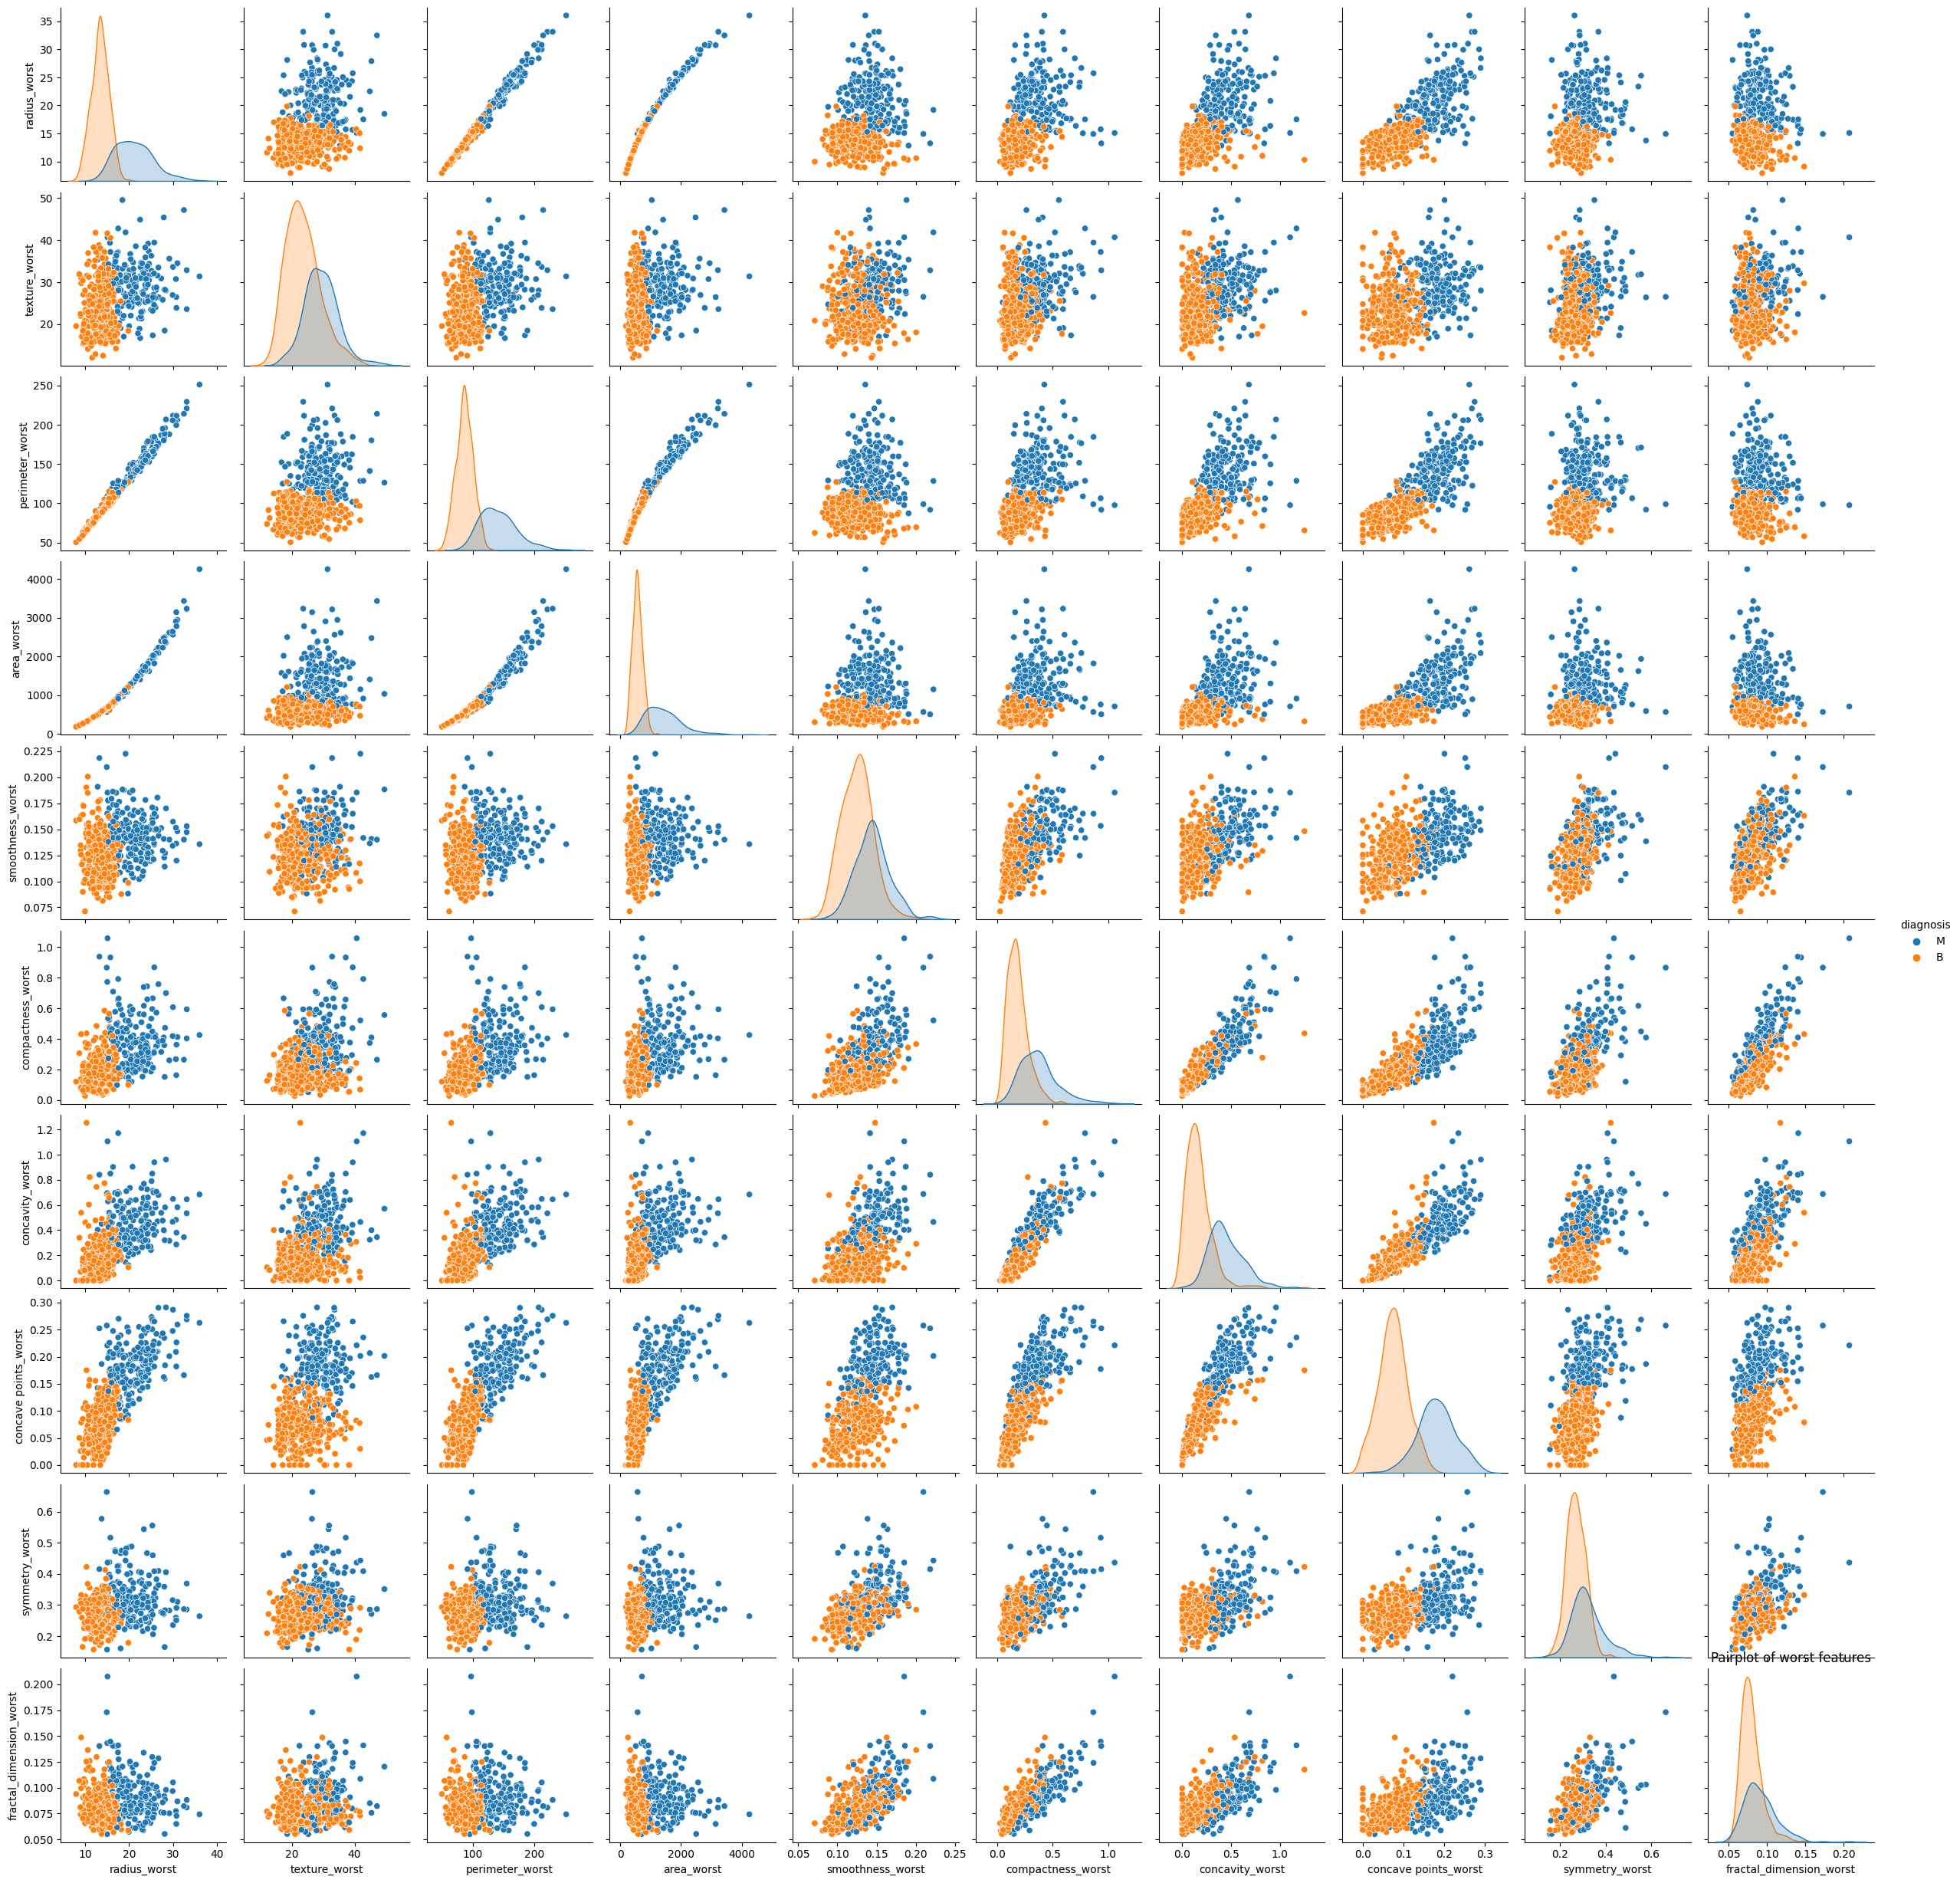

In [17]:
sns.pairplot(dataset, hue='diagnosis',vars=worst_feature)
plt.title("Pairplot of worst features")
plt.show()

### Correlation matrix

In [18]:
label

'diagnosis'

[Text(0.5, 0, 'radius_mean'),
 Text(2.5, 0, 'perimeter_mean'),
 Text(4.5, 0, 'smoothness_mean'),
 Text(6.5, 0, 'concavity_mean'),
 Text(8.5, 0, 'symmetry_mean'),
 Text(10.5, 0, 'radius_se'),
 Text(12.5, 0, 'perimeter_se'),
 Text(14.5, 0, 'smoothness_se'),
 Text(16.5, 0, 'concavity_se'),
 Text(18.5, 0, 'symmetry_se'),
 Text(20.5, 0, 'radius_worst'),
 Text(22.5, 0, 'perimeter_worst'),
 Text(24.5, 0, 'smoothness_worst'),
 Text(26.5, 0, 'concavity_worst'),
 Text(28.5, 0, 'symmetry_worst')]

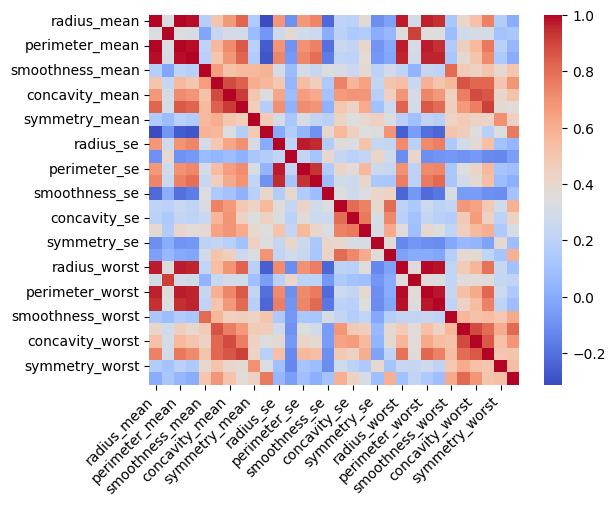

In [19]:
ax = sns.heatmap(dataset.iloc[:, 2:].corr(),
                 cmap='coolwarm', annot=False, square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

<Axes: >

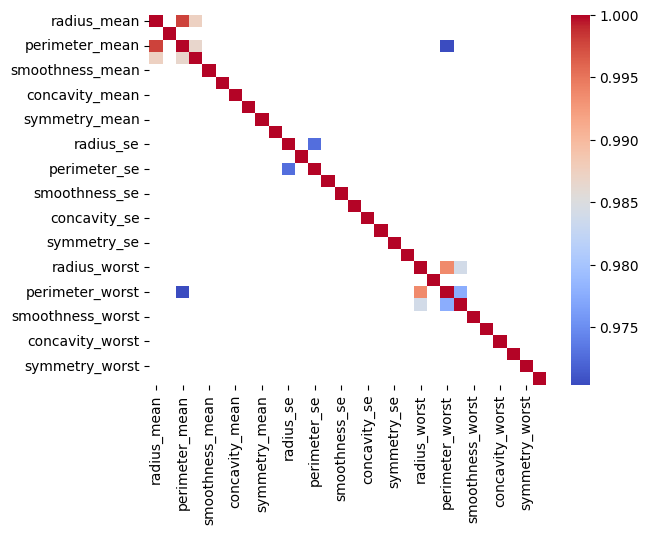

In [20]:
corr = dataset.iloc[:,2:].corr()
significant_corr = corr[corr > 0.97]
corrx = significant_corr.dropna(how='all').dropna(axis=1, how='all')
sns.heatmap(corrx, cmap='coolwarm')

In [21]:
# corrx = list(corrx)
# print(f"there are {len(corrx)} features that are highly correlated with each other")

### train test set

In [22]:
X = dataset.iloc[:, 2:]
y = dataset.diagnosis
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean   
0          17.99         10.38          122.80     1001.0          0.11840  \
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean   
0             0.27760         0.30010              0.14710         0.2419  \
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst   
0                   0.07871  ...        25.380          17.33  \
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst   
0             184.60      2019.0           0.16220            0.66560  \
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst   
0             0.7119                0.2654          0.4601  \
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

### lets transform binary text to numeric value ( 0 , 1) ; 0 is noncancerous 1 is cancerous

In [23]:
y = y.replace({'M': 1, 'B': 0})
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

### Split datasets into Train , Test, and Validation set

In [29]:
from sklearn.model_selection import train_test_split
X_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)
# X_train , x_val , y_train , y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=0)
print(f"X_train shape: {X_train.shape} x_test shape: {x_test.shape} ")
print(f"y_train shape: {y_train.shape} y_test shape: {y_test.shape} ")
X_train.head() , y_train.head()


X_train shape: (455, 30) x_test shape: (114, 30) 
y_train shape: (455,) y_test shape: (114,) 


(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean   
 338        10.05         17.53           64.41      310.8          0.10070  \
 427        10.80         21.98           68.79      359.9          0.08801   
 406        16.14         14.86          104.30      800.0          0.09495   
 96         12.18         17.84           77.79      451.1          0.10450   
 490        12.25         22.44           78.18      466.5          0.08192   
 
      compactness_mean  concavity_mean  concave points_mean  symmetry_mean   
 338           0.07326         0.02511              0.01775         0.1890  \
 427           0.05743         0.03614              0.01404         0.2016   
 406           0.08501         0.05500              0.04528         0.1735   
 96            0.07057         0.02490              0.02941         0.1900   
 490           0.05200         0.01714              0.01261         0.1544   
 
      fractal_dimension_mean  ...  radius_worst  textu

### Normalization/Standardization

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(x_test)
# X_val_scaled = scaler.transform(x_val)

### Modelling

In [31]:
from collections import defaultdict

model_dict = defaultdict()
model_dict

defaultdict(None, {})

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline , Pipeline
from scipy.stats import randint , uniform 

In [32]:
from sklearn.linear_model import LogisticRegressionCV , LinearRegression 


Gradient Boost

In [36]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier 

In [38]:
gb = GradientBoostingClassifier()

params_gb = {'learning_rate': uniform(0.01, 0.1),
                 'n_estimators': randint(100, 1000),
                 'max_depth': randint(1, 10),
                 'min_samples_split': randint(2, 10)}

search = RandomizedSearchCV(estimator=gb,param_distributions=params_gb,cv=5,n_iter=5,n_jobs=-1)
search.fit(X_train_scaled,y_train)

print('Best parameters: {}'.format(search.best_params_))
print('Best Score: {}'.format(search.best_score_))


Best parameters: {'learning_rate': 0.07039619282122449, 'max_depth': 1, 'min_samples_split': 7, 'n_estimators': 570}
Best Score: 0.964835164835165


In [39]:
y_pred = search.best_estimator_.predict(X_test_scaled)

In [43]:
accuracy = search.best_estimator_.score(X_test_scaled,y_test)
print(accuracy)

0.9824561403508771


In [44]:
#lets store the result in the dictionary
model_dict['GradientBoostingClassifier']['best_params'] = search.best_params_
model_dict['GradientBoostingClassifier']['best_score'] = search.best_score_
model_dict['GradientBoostingClassifier']['accuracy'] = accuracy 

KeyError: 'GradientBoostingClassifier'